In [16]:
import pandas 
import pickle
import numpy as np
import matplotlib.pyplot as plt 

In [17]:
# to load the pickle file
with open('all_distances.pickle', 'rb') as f:
    df_cost = pickle.load(f)

In [18]:
# convert the entries to integers for from_code and to_code:
df_cost['from_code'] = df_cost['from_code'].astype(int)
df_cost['to_code'] = df_cost['to_code'].astype(int)

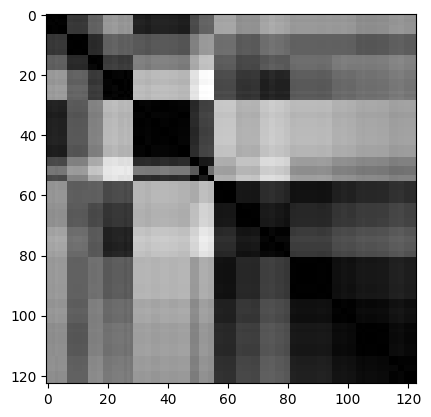

In [19]:
# Extract the from and to, and distance columns:
df_dist = df_cost.pivot(index='from', columns='to', values='distance')
# Plot df_dist as a heatmap in grayscale:
plt.imshow(df_dist, cmap='gray')

In [20]:
# Rules for cleaning up

blocked = np.inf

#1: if from_code == to_code, then distance = blocked
df_cost['rule1'] = df_cost.apply(lambda x: blocked if x['from_code'] == x['to_code'] and x['from'] != x['to'] else x['distance'], axis=1)

#2: if from_type == -1, then distance = blocked, but make sure that it is not already blocked:
df_cost['rule2'] = df_cost.apply(lambda x: blocked if x['from_type'] == -1 and x['from'] != x['to'] else x['distance'], axis=1)
#3: if to_type == 1, then distance = blocked
df_cost['rule3'] = df_cost.apply(lambda x: blocked if x['to_type'] == 1 and x['from'] != x['to'] else x['distance'], axis=1)

#4: if from_type == 1 AND from_dir ==1, AND to_dir ==-1, then distance = blocked
df_cost['rule4'] = df_cost.apply(lambda x: blocked if x['from_type'] == 1 and x['from_dir'] == 1 and x['to_dir'] == -1 else x['distance'], axis=1)
#5: if from_type == 1 AND from_dir ==-1, AND to_dir ==1, then distance = blocked
df_cost['rule5'] = df_cost.apply(lambda x: blocked if x['from_type'] == 1 and x['from_dir'] == -1 and x['to_dir'] == 1 else x['distance'], axis=1)
#6: if from_type ==-1 AND from_dir ==1, AND to_dir ==-1, then distance = blocked
df_cost['rule6'] = df_cost.apply(lambda x: blocked if x['from_type'] == -1 and x['from_dir'] == 1 and x['to_dir'] == -1 else x['distance'], axis=1)
#7: if from_type ==-1 AND from_dir ==-1, AND to_dir ==1, then distance = blocked
df_cost['rule7'] = df_cost.apply(lambda x: blocked if x['from_type'] == -1 and x['from_dir'] == -1 and x['to_dir'] == 1 else x['distance'], axis=1)

#8: if from_type == 0 and to_type == 0, AND from_dir != to_dir, then distance = blocked
df_cost['rule8'] = df_cost.apply(lambda x: blocked if x['from_type'] == 0 and x['to_type'] == 0 and x['from_dir'] != x['to_dir'] else x['distance'], axis=1)

In [21]:
#Check if there are any inf values in any of the rule# columns, then set cost = blocked else cost = distance
df_cost['cost'] = df_cost.apply(lambda x: blocked if np.isinf(x['rule1']) or np.isinf(x['rule2']) or np.isinf(x['rule3']) or np.isinf(x['rule4']) or 
                                np.isinf(x['rule5']) or np.isinf(x['rule6']) or np.isinf(x['rule7']) or np.isinf(x['rule8']) else x['distance'], axis=1)

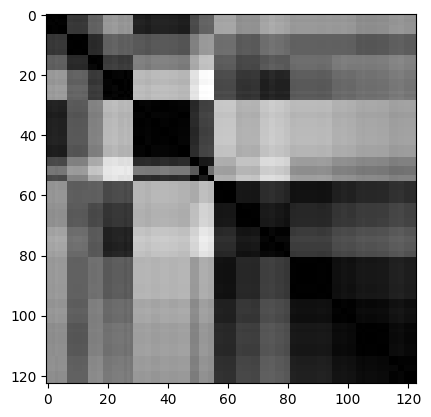

In [22]:
# Extract the from and to, and distance columns:
df_dist = df_cost.pivot(index='from', columns='to', values='distance')
# Plot df_dist as a heatmap in grayscale:
plt.imshow(df_dist, cmap='gray')

# black means short distance, white means long distance

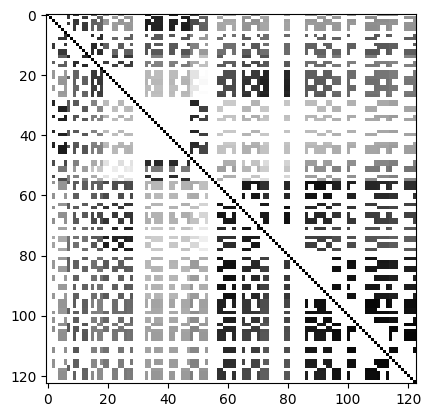

In [23]:
# Extract the from and to, and distance columns:
df_cost_display = df_cost.pivot(index='from', columns='to', values='cost')
# Plot df_dist as a heatmap in grayscale:
plt.imshow(df_cost_display, cmap='gray')

# black means low cost, white means blocked 

In [24]:
#print the last 100 entries of the dataframe df_cost:
df_cost.tail(100)

,from,to,from_code,to_code,from_type,to_type,from_dir,to_dir,distance,rule1,rule2,rule3,rule4,rule5,rule6,rule7,rule8,cost
15029,711712,711712,711,711,0.0,0.0,-1.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
15030,711712,711713,711,711,0.0,0.0,-1.0,-1.0,0.0,inf,0.0,0.0,0.0,0.0,0.0,0.0,0.0,inf
15031,711713,711712,711,711,0.0,0.0,-1.0,-1.0,0.0,inf,0.0,0.0,0.0,0.0,0.0,0.0,0.0,inf
15032,711712,711721,711,711,0.0,-1.0,-1.0,-1.0,0.0,inf,0.0,0.0,0.0,0.0,0.0,0.0,0.0,inf
15033,711721,711712,711,711,-1.0,0.0,-1.0,-1.0,0.0,inf,inf,0.0,0.0,0.0,0.0,0.0,0.0,inf
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15124,710812,710801,710,710,0.0,-1.0,-1.0,-1.0,0.0,inf,0.0,0.0,0.0,0.0,0.0,0.0,0.0,inf
15125,710811,710811,710,710,0.0,0.0,-1.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
15126,710811,710812,710,710,0.0,0.0,-1.0,-1.0,0.0,inf,0.0,0.0,0.0,0.0,0.0,0.0,0.0,inf
15127,710812,710811,710,710,0.0,0.0,-1.0,-1.0,0.0,inf,0.0,0.0,0.0,0.0,0.0,0.0,0.0,inf


In [25]:
# extract only from, to and cost columns from the dataframe df_cost and save it to a new dataframe df_csv
df_csv = df_cost[['from', 'to', 'cost']]
df_csv.tail(50)

,from,to,cost
15079,710812,711721,132.6
15080,712751,712751,0.0
15081,712751,712752,inf
15082,712752,712751,inf
15083,712751,712753,inf
15084,712753,712751,inf
15085,712751,712754,inf
15086,712754,712751,inf
15087,712751,710801,232.7
15088,710801,712751,inf


In [26]:
# construct a matrix from the dataframe df_csv to check if everything is correct:
df_matrix = df_csv.pivot(index='from', columns='to', values='cost')

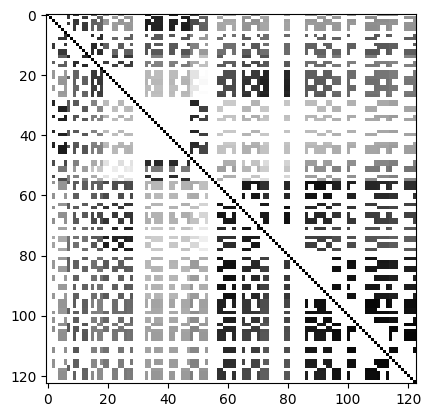

In [27]:
# plot the matrix as a heatmap in grayscale:
import matplotlib.pyplot as plt
plt.imshow(df_matrix, cmap='gray', interpolation='nearest')
plt.show()

In [28]:
#save the dataframe to a CSV file
df_csv.to_csv('denhaag_cost.csv', index=False)